# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

# Differences with Paper

2. The paper uses data from 2010-2012 which are a little outdated. They also use 17 features. We will use data from 2018-2022 experimenting with  different set of features.  Also our dataset
   is significantly larger


In [70]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [71]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [72]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [73]:
warnings.filterwarnings("ignore")

In [74]:
df

,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


In [75]:
print(df.columns)

Index(['HHPers', 'HHSam', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'VertProv', 'AankProv',
       'AfstR', 'RReisduur', 'RVertUur', 'RVertMin', 'KRvm'],
      dtype='object')


In [76]:
new_columns= {"HHPers": "People_in_house", "HHSam": "Household_composition", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive", "VertProv": "Departure_area", "AankProv": "Arrival_area",
              "AfstR": "Distance", "RReisduur": "Duration", 'RVertUur':'Hour', 'RVertMin':'Mins', "KRvm": "Mode"}

In [77]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Hour,Mins,Mode
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Household_composition - eg Parents + child or Single parents - Categorical - Nominal
3) Gender - Male / Female - Categorical - Binary
4) Age - Age of the respondent in years - Numeric - Continuous - Integer
5) Background - The citizenship of the respondent (Dutch or other) - Categorical - Nominal
6) Education - Highest education completed for the respondent - Categorical - Nominal
7) Drivel_License - If the respondent has car driving license - Categorical - Binary
8) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
9) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
10) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
11) Year - Year that the trip occured - Numeric - Integer
12) Month - Month that the trip occured - Categorical
13) Weekday - Day that the trip occured - Categorical
14) Holiday - If the trip occured on a national holiday - Categorical - Binary
15) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
16) Motive - The reason of the trip - Categorial - Nominal
17) Departure_area - The departure province of the trip - Categorical - Nominal
18) Arrival_area - The arrival province of the trip - Categorical - Nominal
19) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
20) Duration - The duration (In minutes) of the trip - Numeric - Continuous
21) Hour - Hour of departure
22) Mins - Minute of departure 
23) Mode - The mode of transportation for the trip - Categorical - Target variable

In [78]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Hour                     False
Mins                     False
Mode                     False
dtype: bool

In [79]:
drops = ['Mins', 'Year', 'Household_composition']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,1,1,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,1,1,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,1,1,10,5,15,5
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,1,1,10,5,18,5
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,1,1,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,8,8,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,8,8,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,8,8,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,8,8,63,15,18,1


In [80]:
df.duplicated().sum()

36766

In [81]:
df = df.drop_duplicates()
df.shape

(780360, 20)

In [82]:
df = df.drop_duplicates(subset=df.columns.difference(['Mode']))
df.shape

(779828, 20)

In [83]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,1,1,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,1,1,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,1,1,10,5,15,5
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,1,1,10,5,18,5
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,1,1,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,8,8,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,8,8,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,8,8,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,8,8,63,15,18,1


# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [84]:
df['Gender'].value_counts()

Gender
2    403430
1    376398
Name: count, dtype: int64

In [85]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [86]:
df['Background'].value_counts()

Background
1    621503
3     82932
2     75393
Name: count, dtype: int64

In [87]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Western migration", 3:"Non Western migration"})

In [88]:
df['Education'].value_counts()

Education
4    323548
3    224886
2     98241
7     85852
1     24499
5     15915
0      6887
Name: count, dtype: int64

In [89]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [90]:
df['Driver_license'].value_counts()

Driver_license
1    582806
0    197022
Name: count, dtype: int64

In [91]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [92]:
df['Electric_bike'].value_counts()

Electric_bike
0    550966
1    228862
Name: count, dtype: int64

In [93]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [94]:
df['Month'].value_counts()

Month
9     72806
11    70552
1     69721
10    69532
3     65511
5     65503
6     64629
8     62905
7     60805
12    60665
2     59250
4     57949
Name: count, dtype: int64

In [95]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [96]:
df['Weekday'].value_counts()

Weekday
6    123509
5    117757
3    115183
4    114863
2    112316
7    111786
1     84414
Name: count, dtype: int64

In [97]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [98]:
df['Round_trip'].value_counts()

Round_trip
0    681506
1     98322
Name: count, dtype: int64

In [99]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [100]:
df['Departure_area'].value_counts()

Departure_area
9     192972
8     131354
11     96459
7      89566
6      82296
4      44707
12     42610
2      22597
1      22150
5      20535
3      17548
10     14251
0       2783
Name: count, dtype: int64

In [101]:
df['Departure_area'] = df['Departure_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [102]:
df['Arrival_area'].value_counts()

Arrival_area
9     193343
8     131371
11     96546
7      89767
6      82354
4      44688
12     42613
2      22545
1      22151
5      20516
3      17472
10     14188
0       2274
Name: count, dtype: int64

In [103]:
df['Arrival_area'] = df['Arrival_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [104]:
df['Motive'].value_counts()

Motive
4    150866
7    141254
1    135272
9     82857
8     80988
6     79858
5     63992
3     25370
2     19371
Name: count, dtype: int64

In [105]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [106]:
df['Holiday'].value_counts()

Holiday
0    767121
1     12707
Name: count, dtype: int64

In [107]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [108]:
df['Mode'].value_counts()

Mode
1    257087
5    224066
6    188586
2     81617
4     28472
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [109]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [110]:
df['Mode'].value_counts()

Mode
car                 338704
bike                224066
walk                188586
public transport     28472
Name: count, dtype: int64

In [111]:
df.shape

(779828, 20)

In [112]:
df.shape

(779828, 20)

In [113]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Hour,Mode
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,60,15,10,car
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,60,10,11,car
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,Groningen,Groningen,10,5,15,bike
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,Groningen,Groningen,10,5,18,bike
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,Groningen,Groningen,30,10,9,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Western migration,Higher education,Yes,1,0,No,December,Thursday,No,No,Education,North Holland,North Holland,110,35,15,car
817122,3,Female,49,Non Western migration,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,11,7,16,walk
817123,3,Female,49,Non Western migration,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,6,5,17,walk
817124,3,Female,49,Non Western migration,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,North Holland,North Holland,63,15,18,car


# Data Cleaning

In [114]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Distance,Duration,Hour
count,779828.000000,779828.000000,779828.000000,779828.000000,779828.000000,779828.000000,779828.000000
mean,2.853474,42.293275,1.380512,0.207398,97.411619,24.068220,13.629313
std,1.387623,20.755267,1.001539,0.592684,199.604403,31.743472,4.254452
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,11.000000,10.000000,10.000000
50%,3.000000,42.000000,1.000000,0.000000,30.000000,15.000000,14.000000
75%,4.000000,59.000000,2.000000,0.000000,86.000000,30.000000,17.000000
max,10.000000,99.000000,10.000000,19.000000,6600.000000,993.000000,33.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [115]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [116]:
df = df.drop("Distance", axis=1)

In [117]:
df = df[(df['Hour'] <= 23)]

In [118]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,779479.000000,779479.000000,779479.000000,779479.000000,779479.000000,779479.000000,779479.000000
mean,2.853697,42.298442,1.380675,0.207430,24.072103,13.624563,9.743513
std,1.387583,20.756516,1.001248,0.592733,31.749094,4.249444,19.963941
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779479 entries, 0 to 817125
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  779479 non-null  int64  
 1   Gender           779479 non-null  object 
 2   Age              779479 non-null  int64  
 3   Background       779479 non-null  object 
 4   Education        779479 non-null  object 
 5   Driver_license   779479 non-null  object 
 6   Cars_in_house    779479 non-null  int64  
 7   Mopeds_in_house  779479 non-null  int64  
 8   Electric_bike    779479 non-null  object 
 9   Month            779479 non-null  object 
 10  Weekday          779479 non-null  object 
 11  Holiday          779479 non-null  object 
 12  Round_trip       779479 non-null  object 
 13  Motive           779479 non-null  object 
 14  Departure_area   779479 non-null  object 
 15  Arrival_area     779479 non-null  object 
 16  Duration         779479 non-null  int64  
 

We will also remove samples where Distance and Duration are 0

In [120]:
df = df[(df['Distance_in_kms'] > 0)]

In [121]:
df = df[(df['Duration'] > 0)]

In [122]:
df.shape

(779260, 20)

In [123]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,779260.000000,779260.000000,779260.000000,779260.000000,779260.000000,779260.000000,779260.000000
mean,2.853813,42.299265,1.380693,0.207447,24.078868,13.624829,9.746251
std,1.387608,20.757533,1.001130,0.592769,31.750990,4.249400,19.966077
min,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [124]:
df = df[(df['Age'] >= 18)]
df.shape

(666088, 20)

In [125]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,666088.000000,666088.000000,666088.000000,666088.000000,666088.000000,666088.000000,666088.000000
mean,2.619971,47.522523,1.349071,0.205564,24.702792,13.631332,10.469047
std,1.293811,17.729144,0.986730,0.592583,32.240925,4.297548,20.794329
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,19.000000,960.000000,23.000000,660.000000


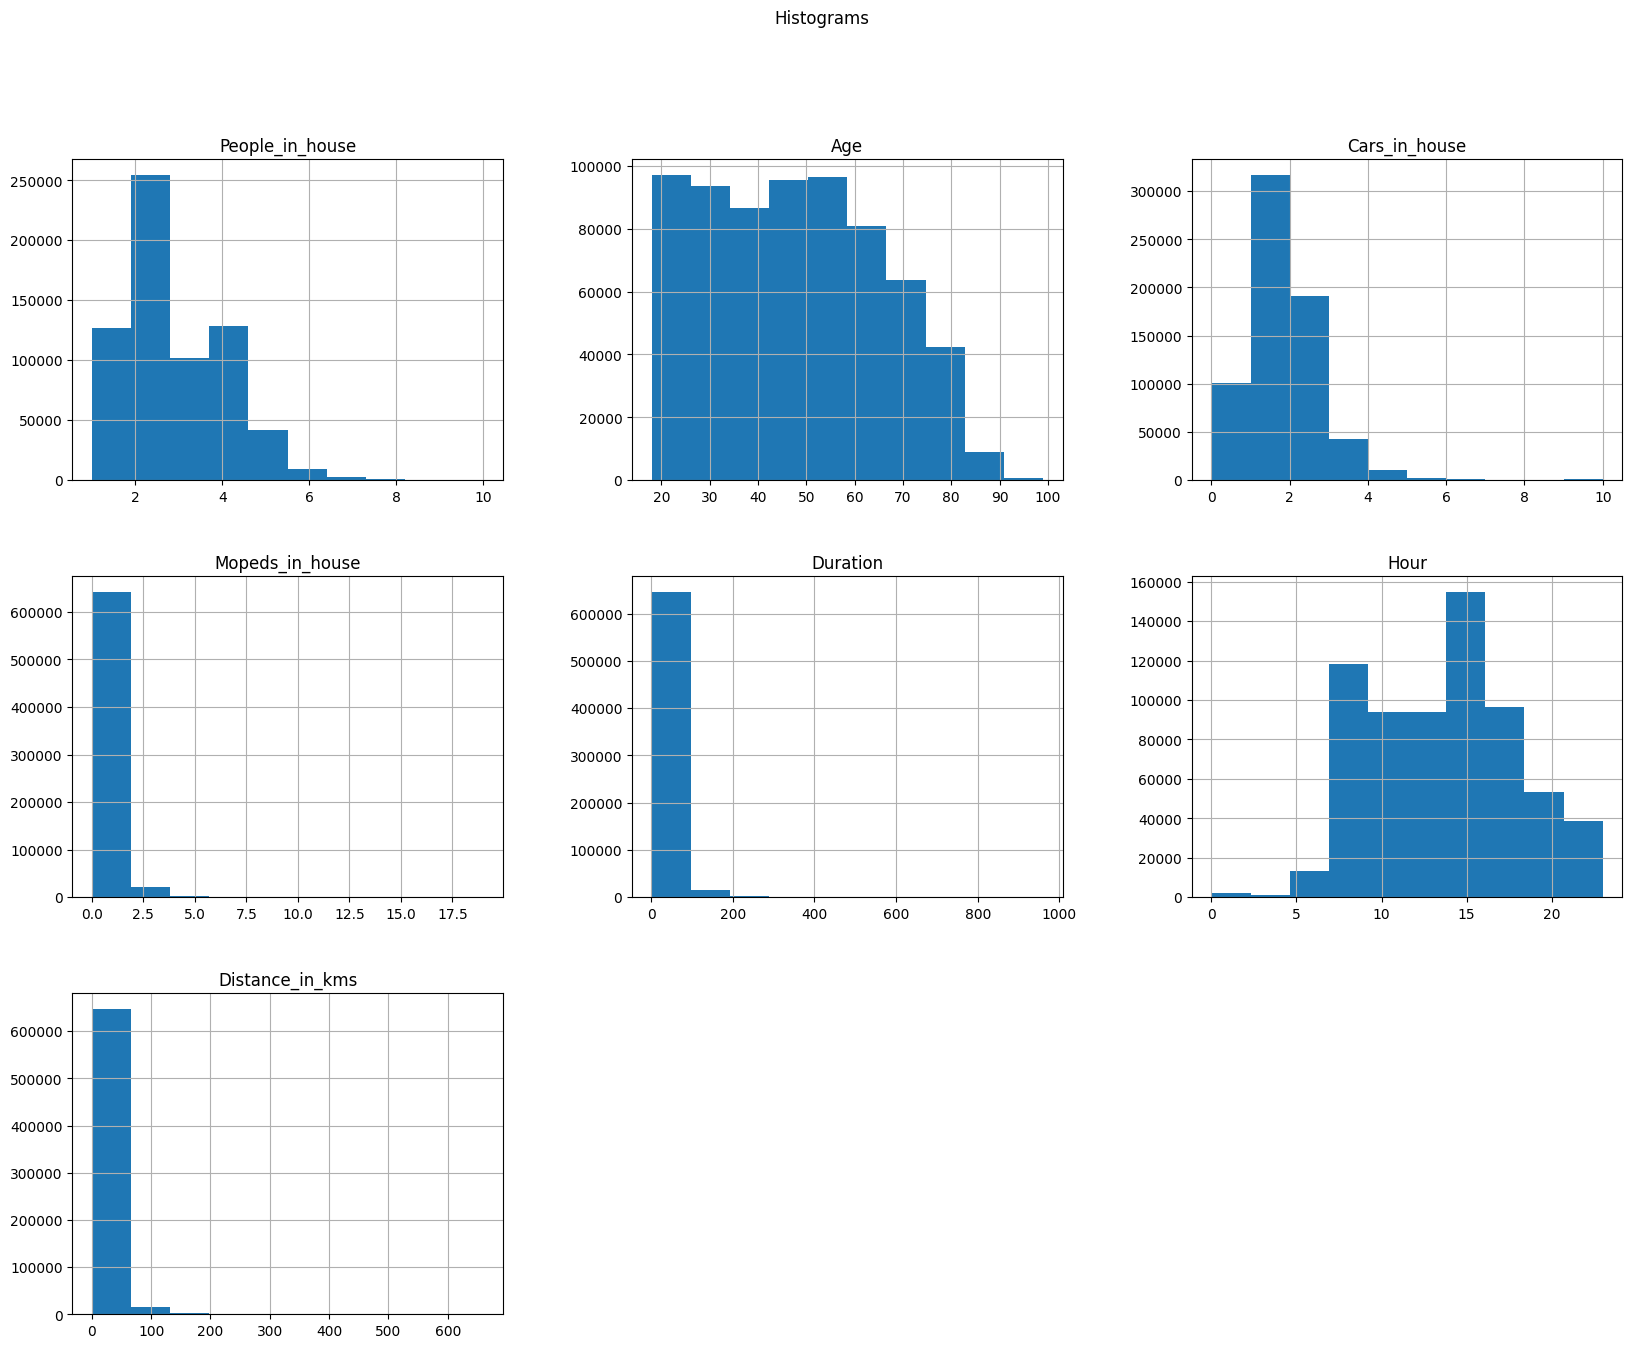

In [126]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [127]:
df = df[(df['Duration'] <= 200)]

In [128]:
df = df[(df['Distance_in_kms'] <= 150)]

In [129]:
df = df[(df['Mopeds_in_house'] <= 5)]

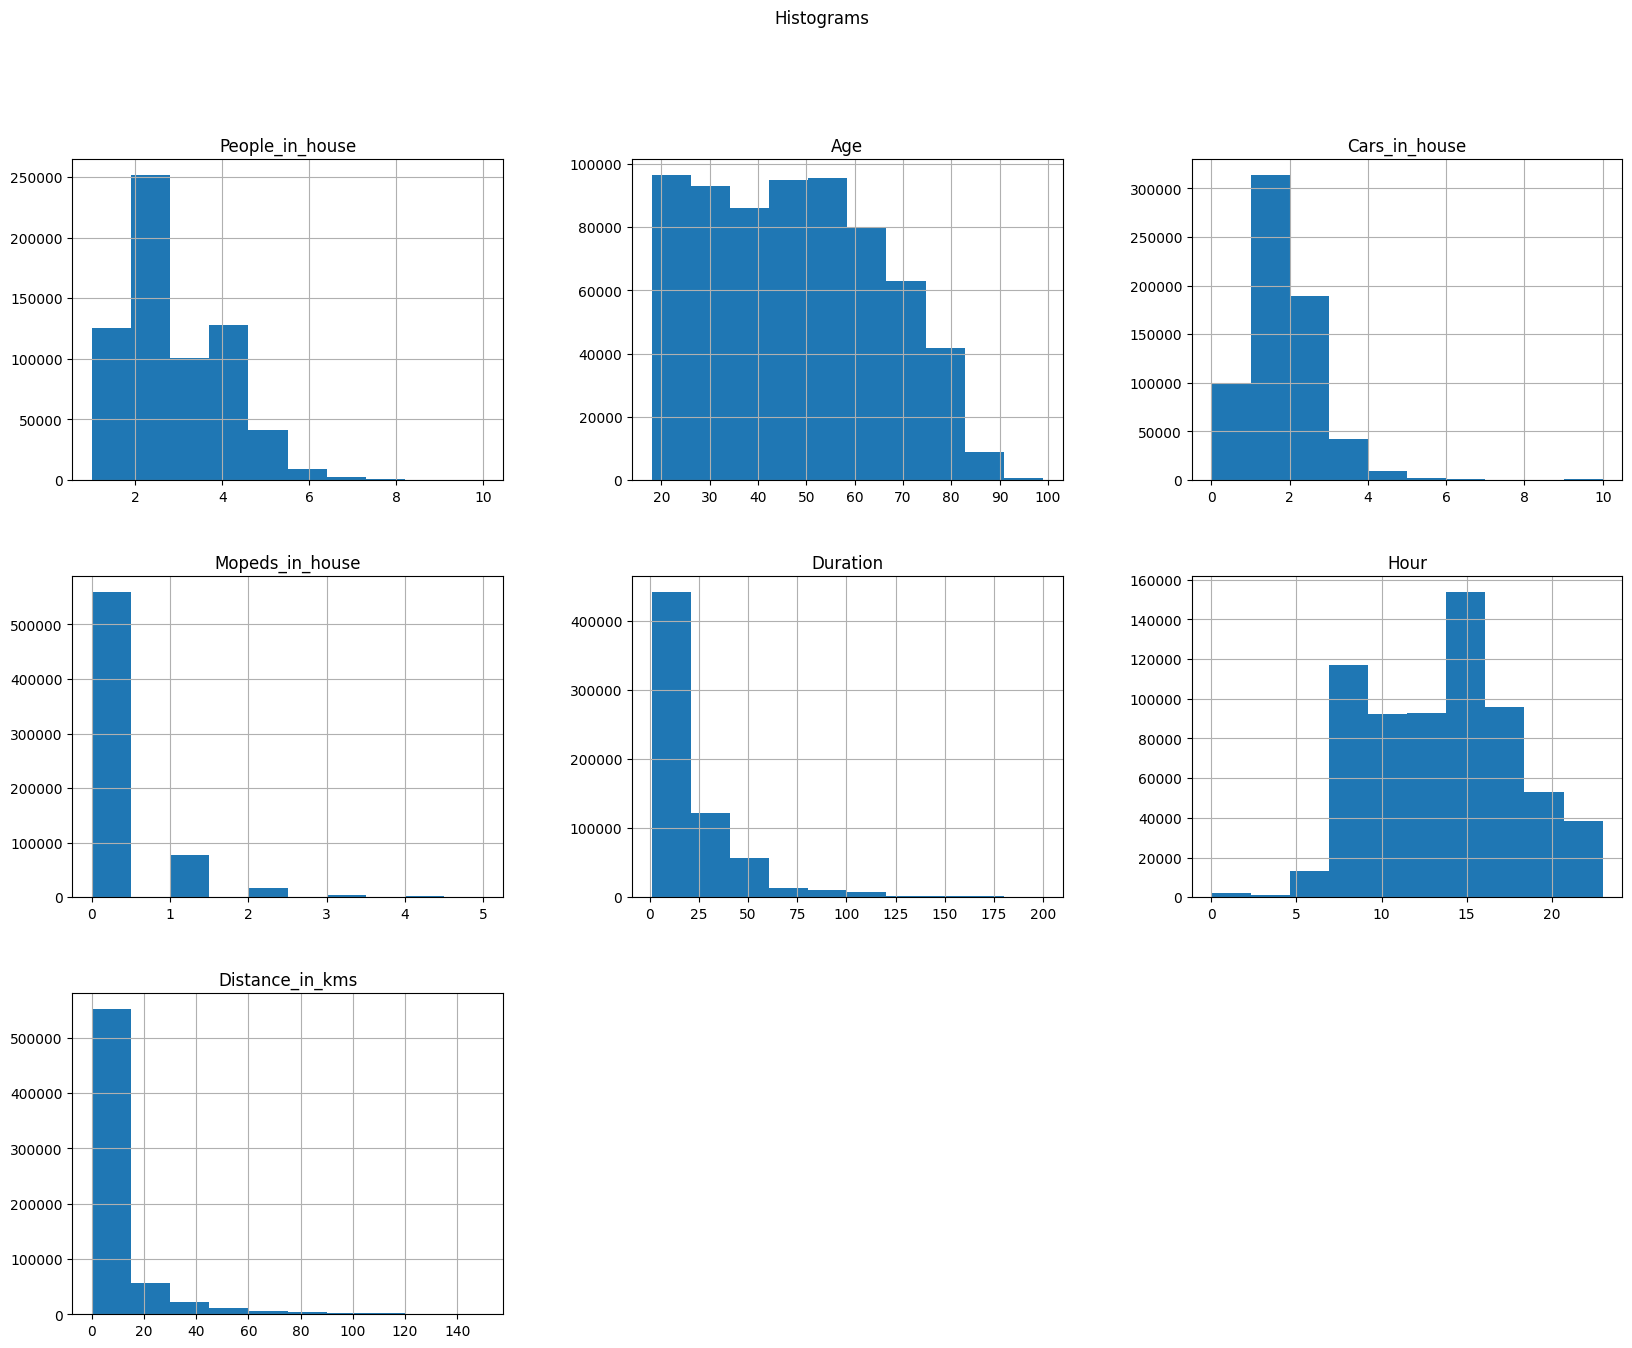

In [130]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [131]:
df.shape

(659845, 20)

In [132]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,659845.000000,659845.000000,659845.000000,659845.000000,659845.000000,659845.000000,659845.000000
mean,2.621122,47.480046,1.347562,0.197549,22.971402,13.644685,9.702596
std,1.294353,17.725887,0.984345,0.532204,24.271318,4.300804,17.592279
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.200000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,9.500000
max,10.000000,99.000000,10.000000,5.000000,200.000000,23.000000,150.000000


# Explanatory Data Analysis

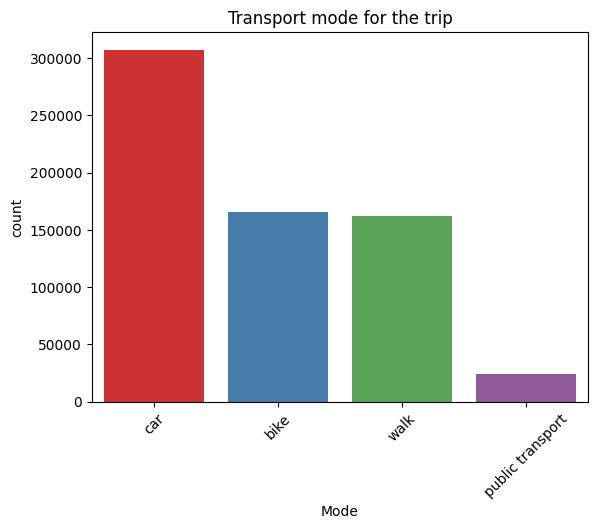

In [133]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [134]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 46.602914
bike                25.123324
walk                24.558040
public transport     3.715721
Name: proportion, dtype: float64


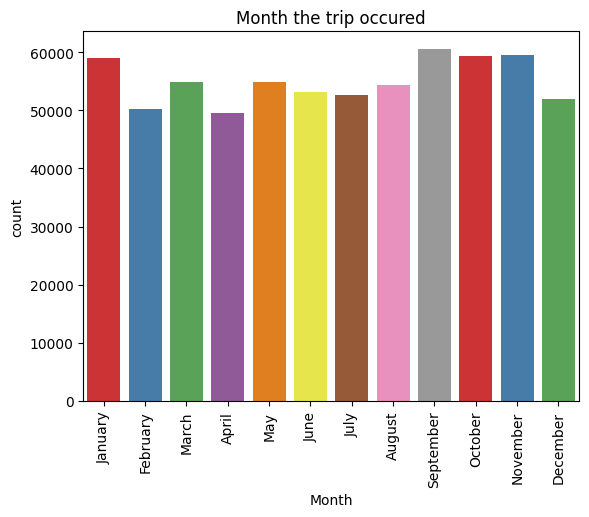

In [135]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

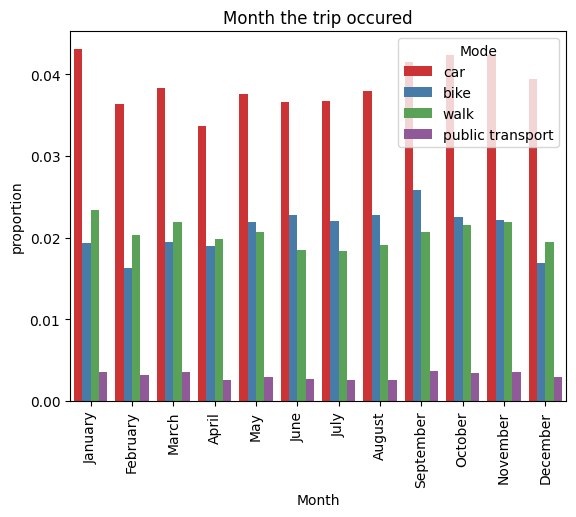

In [136]:
sns.countplot(x='Month', data=df, palette='Set1', hue='Mode', stat='proportion')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [137]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.177004
November     9.007722
October      8.984231
January      8.951193
March        8.322106
May          8.307254
August       8.228144
June         8.043707
July         7.976570
December     7.879123
February     7.619820
April        7.503126
Name: proportion, dtype: float64


In [138]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

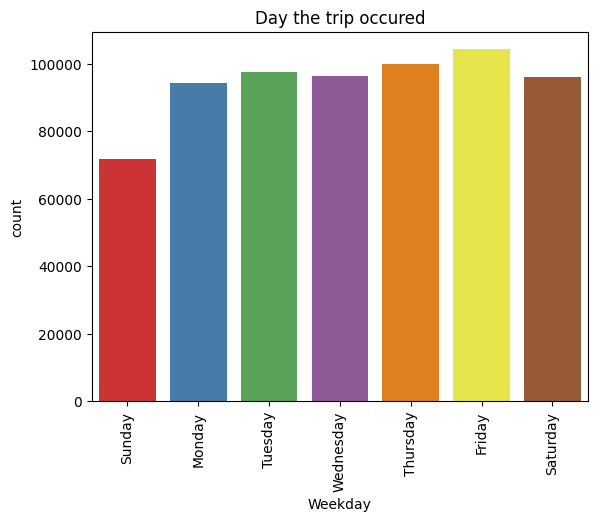

In [139]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

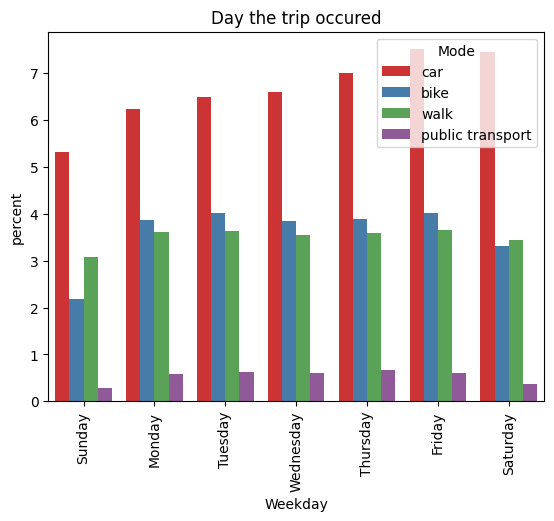

In [140]:
sns.countplot(x='Weekday', data=df, palette='Set1', hue='Mode', stat='percent', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [141]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.797043
Thursday     15.146587
Tuesday      14.761952
Wednesday    14.592215
Saturday     14.547962
Monday       14.298358
Sunday       10.855883
Name: proportion, dtype: float64


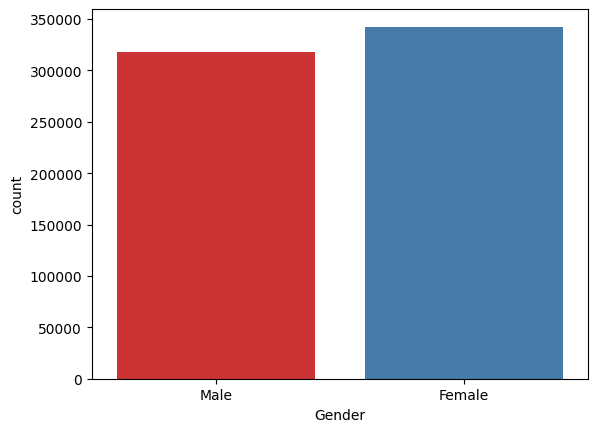

In [142]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [143]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.899916
Male      48.100084
Name: proportion, dtype: float64


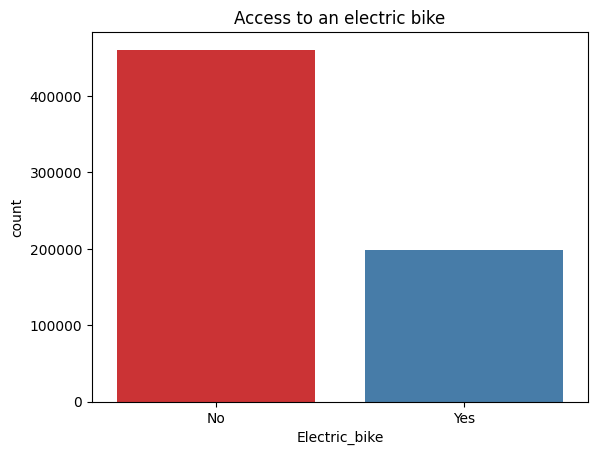

In [144]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [145]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     69.848677
Yes    30.151323
Name: proportion, dtype: float64


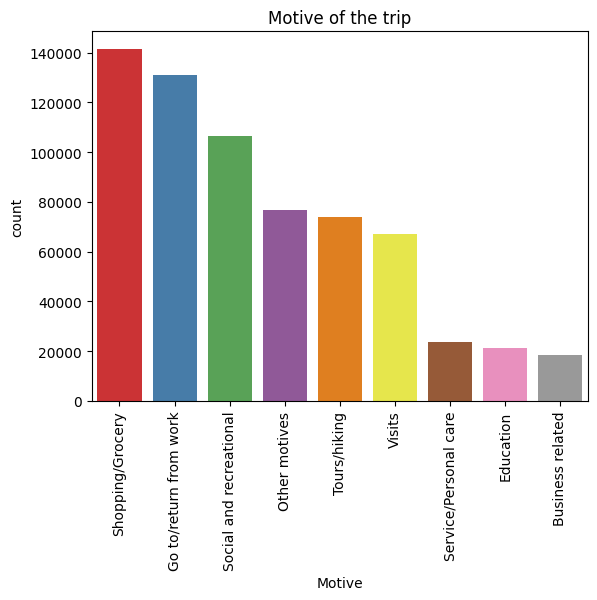

In [146]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [147]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.434882
Go to/return from work     19.822686
Social and recreational    16.134395
Other motives              11.647735
Tours/hiking               11.203540
Visits                     10.156173
Service/Personal care       3.565989
Education                   3.208935
Business related            2.825664
Name: proportion, dtype: float64


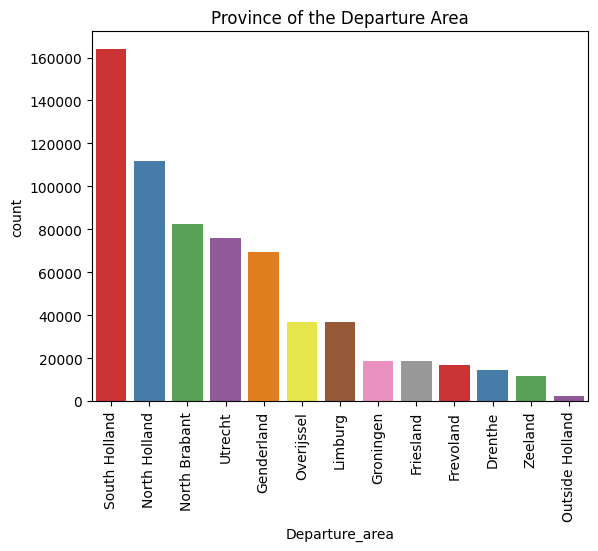

In [148]:
ordered_categories = df['Departure_area'].value_counts().index
sns.countplot(x='Departure_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Departure Area')
plt.show()

In [149]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.855383
North Holland      16.939584
North Brabant      12.508089
Utrecht            11.525282
Genderland         10.500042
Overijssel          5.585706
Limburg             5.571005
Groningen           2.841425
Friesland           2.815055
Frevoland           2.545143
Drenthe             2.195516
Zeeland             1.769203
Outside Holland     0.348567
Name: proportion, dtype: float64


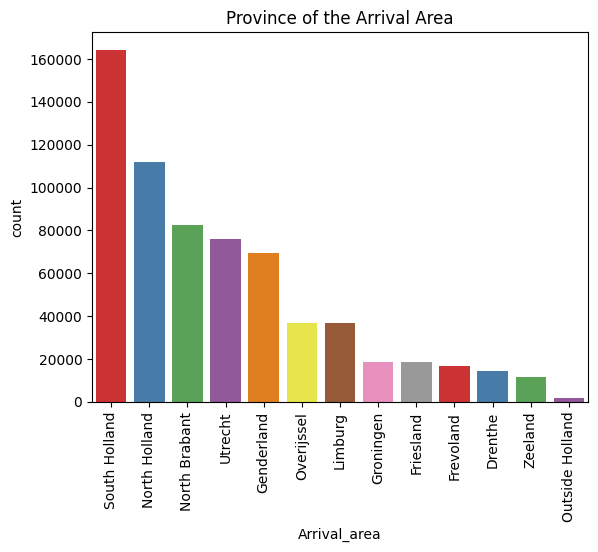

In [150]:
ordered_categories = df['Arrival_area'].value_counts().index
sns.countplot(x='Arrival_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Arrival Area')
plt.show()

In [151]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.895544
North Holland      16.936402
North Brabant      12.515363
Utrecht            11.541650
Genderland         10.503527
Overijssel          5.584796
Limburg             5.575097
Groningen           2.843698
Friesland           2.815055
Frevoland           2.537566
Drenthe             2.189454
Zeeland             1.763141
Outside Holland     0.298707
Name: proportion, dtype: float64


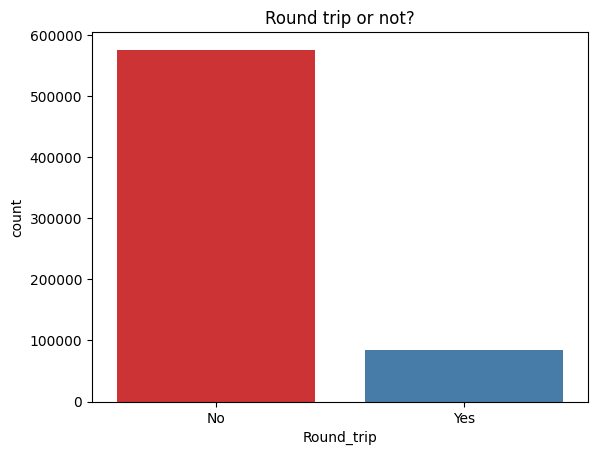

In [152]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [153]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     87.256553
Yes    12.743447
Name: proportion, dtype: float64


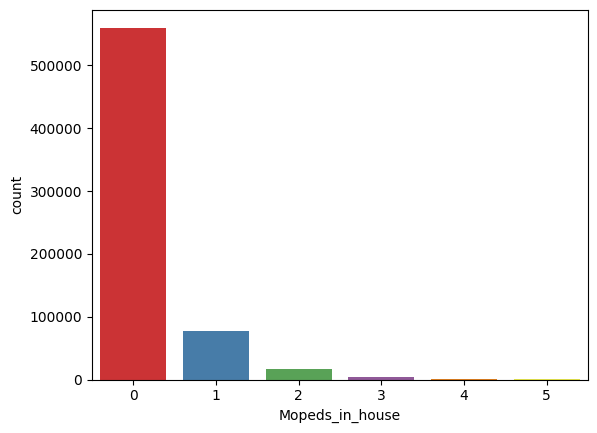

In [154]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [155]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.890239
1    11.660163
2     2.581818
3     0.607264
4     0.193227
5     0.067289
Name: proportion, dtype: float64


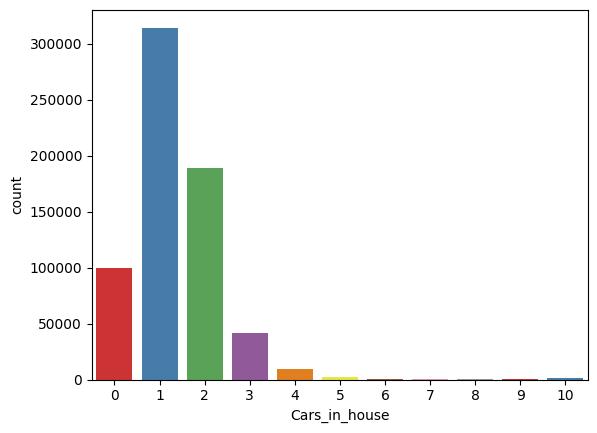

In [156]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [157]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.625124
2     28.657791
0     15.160379
3      6.339368
4      1.496412
5      0.352810
10     0.172919
6      0.113208
7      0.040464
9      0.023793
8      0.017731
Name: proportion, dtype: float64


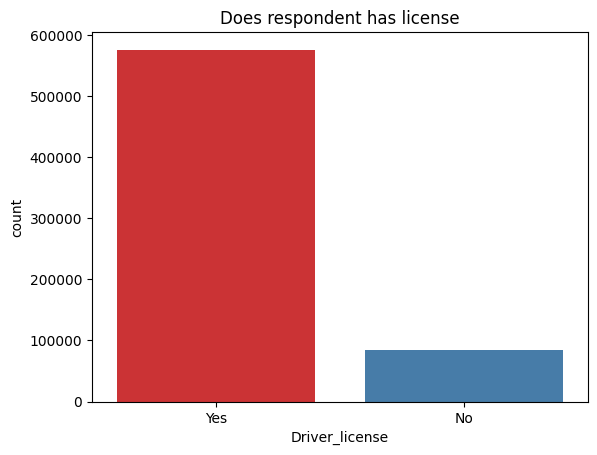

In [158]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [159]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    87.325054
No     12.674946
Name: proportion, dtype: float64


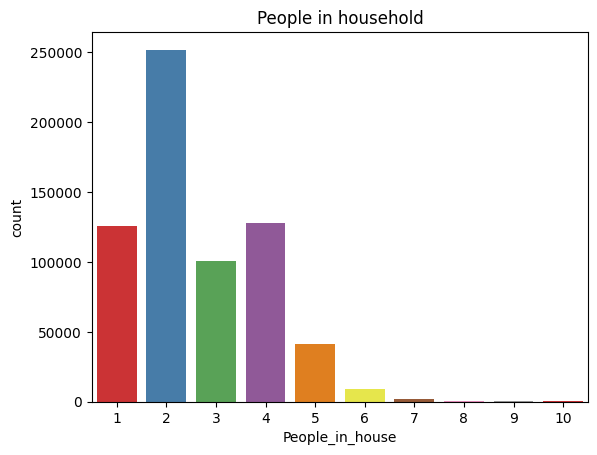

In [160]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [161]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     38.187150
4     19.338633
1     19.034319
3     15.247672
5      6.294509
6      1.403966
7      0.331138
8      0.097144
9      0.040161
10     0.025309
Name: proportion, dtype: float64


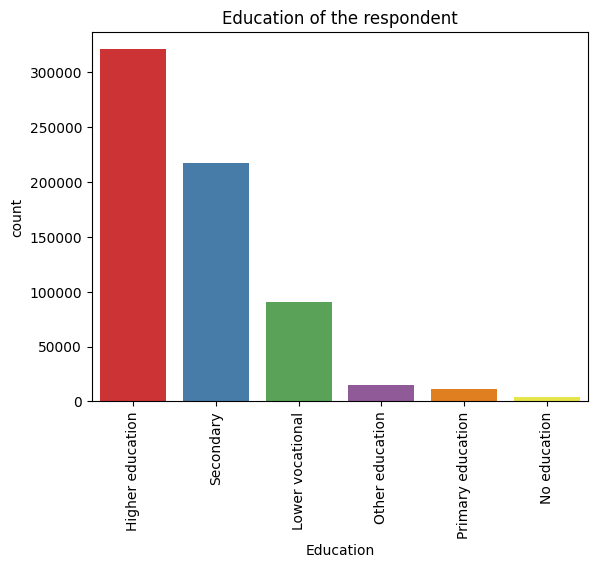

In [162]:
ordered_categories = df['Education'].value_counts().index
sns.countplot(x='Education', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Education of the respondent')
plt.show()

In [163]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.532307
Secondary            32.934704
Lower vocational     13.752927
Other education       2.334639
Primary education     1.785722
No education          0.659700
Name: proportion, dtype: float64


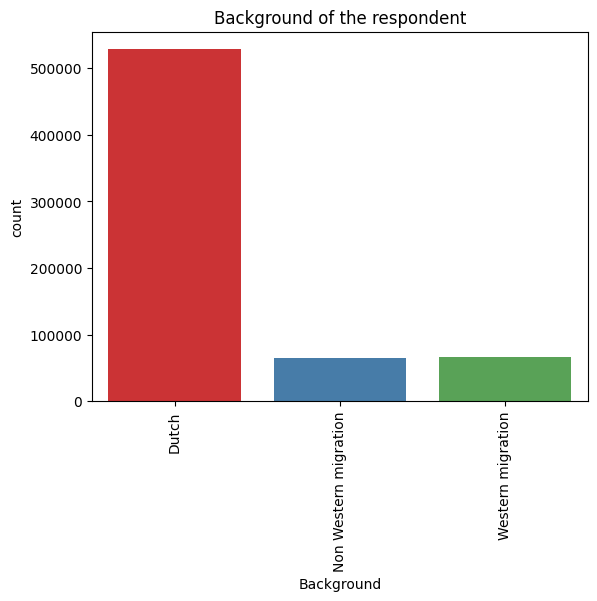

In [164]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Background of the respondent')
plt.show()

In [165]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch                    80.075169
Western migration        10.012503
Non Western migration     9.912328
Name: proportion, dtype: float64


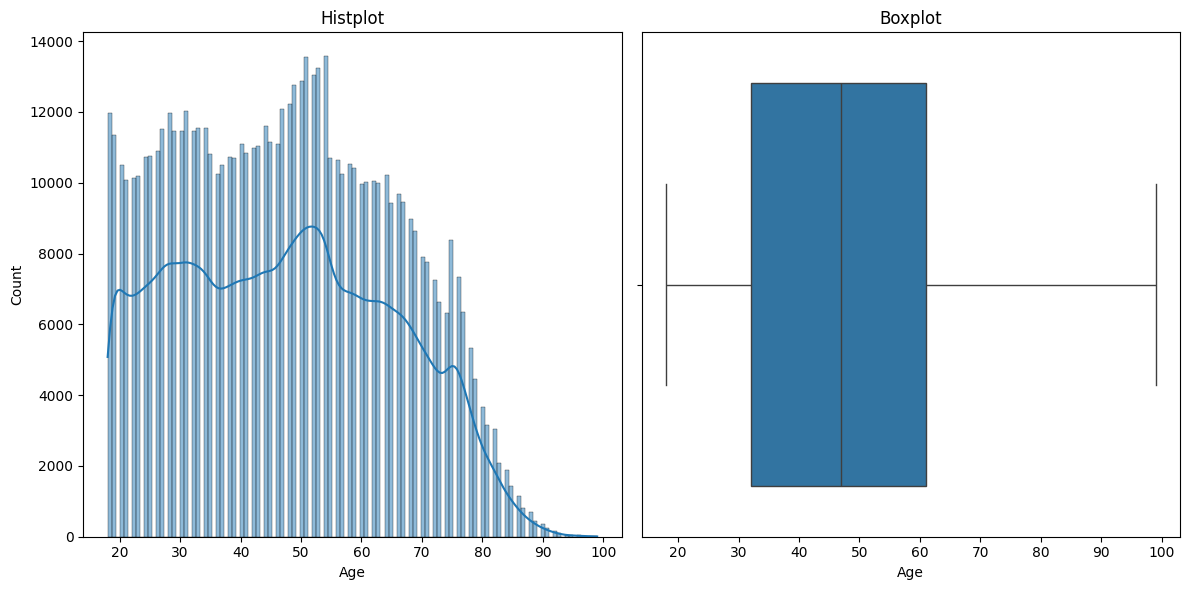

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

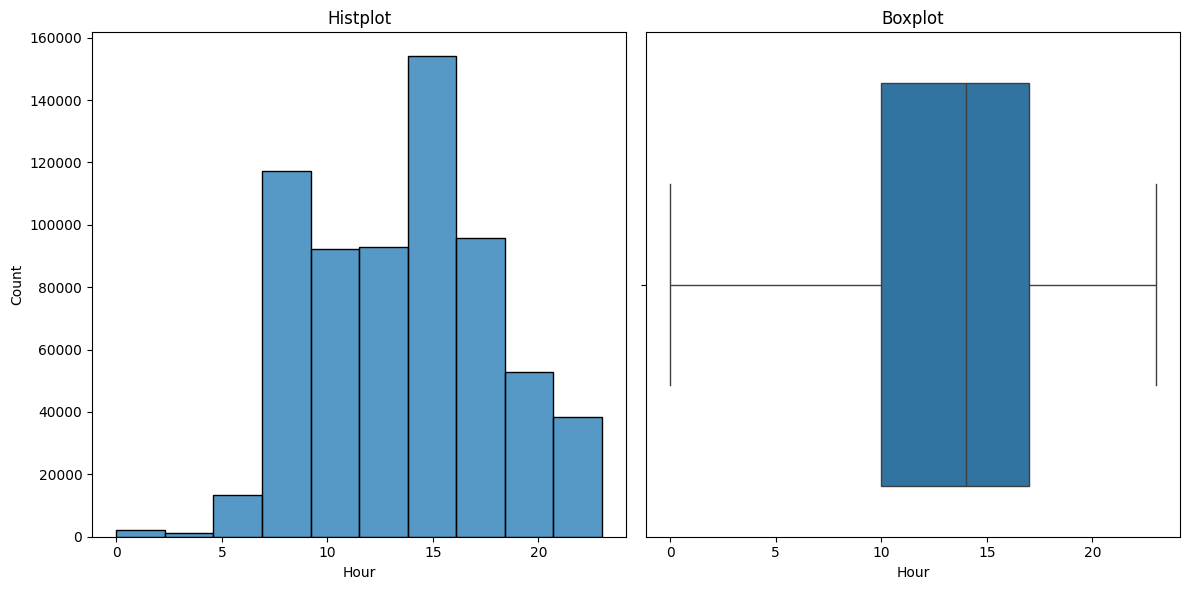

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Hour', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Hour', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

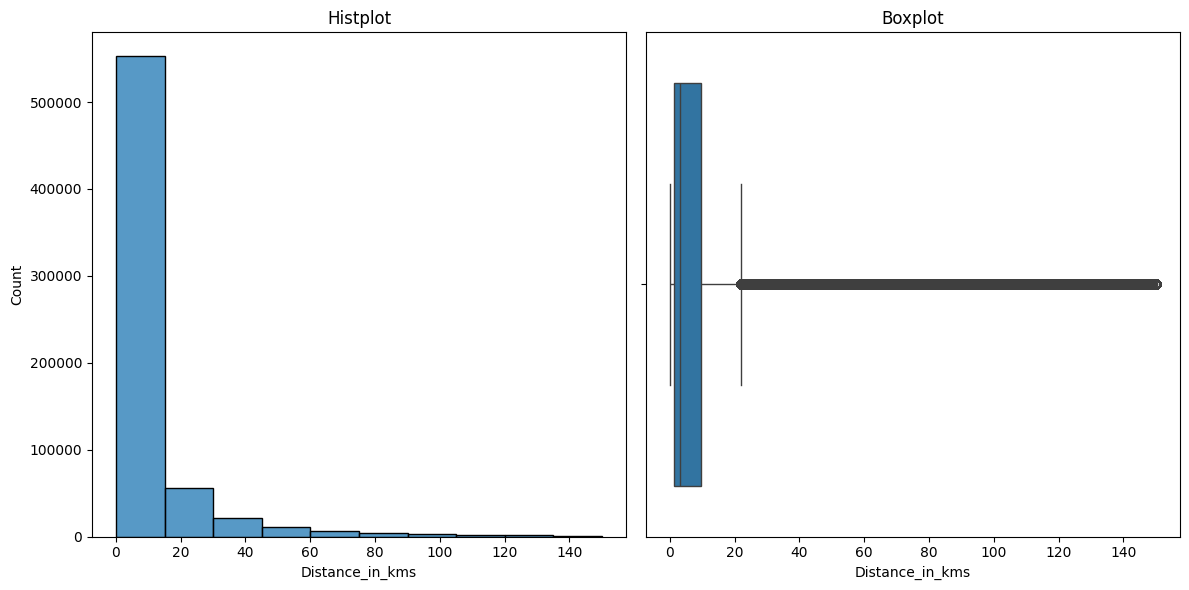

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

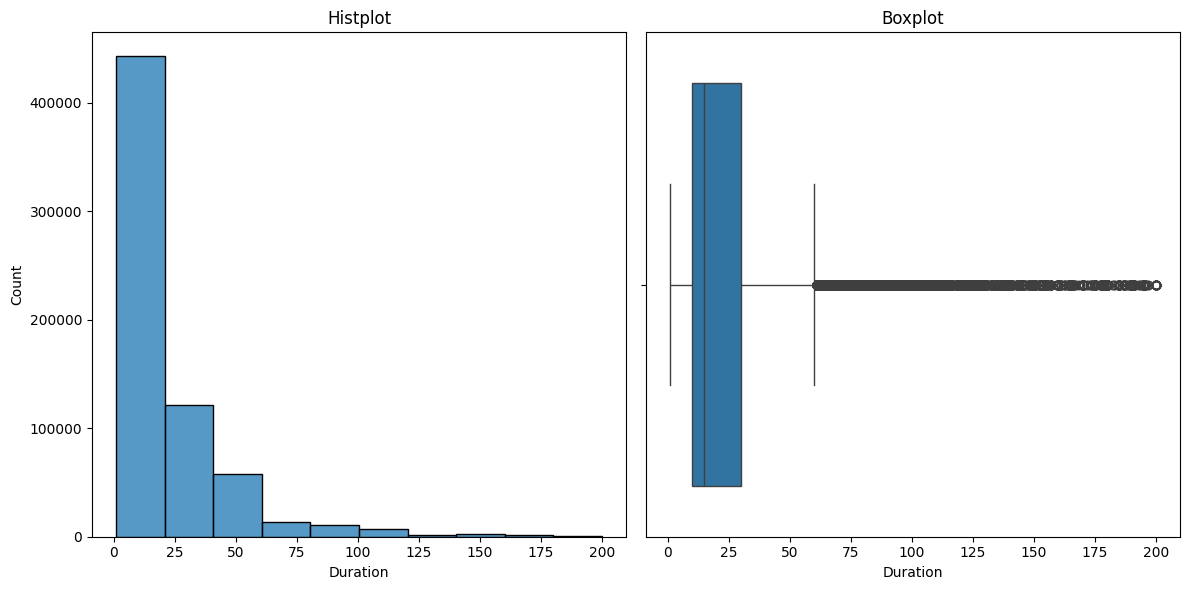

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

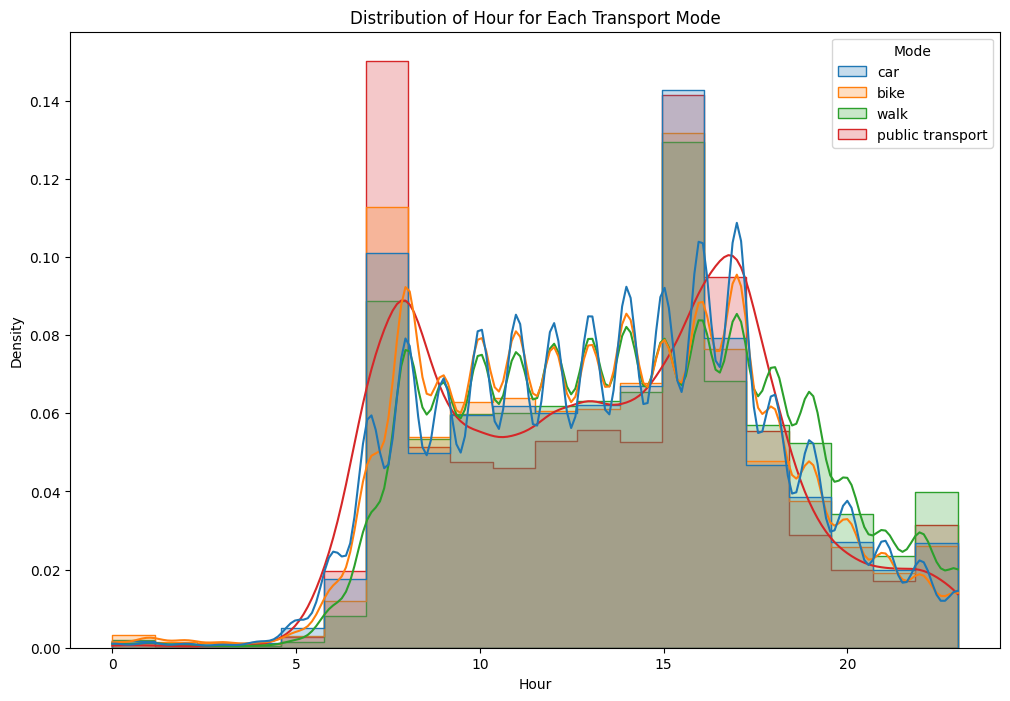

In [170]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Hour', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Hour for Each Transport Mode')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.show()

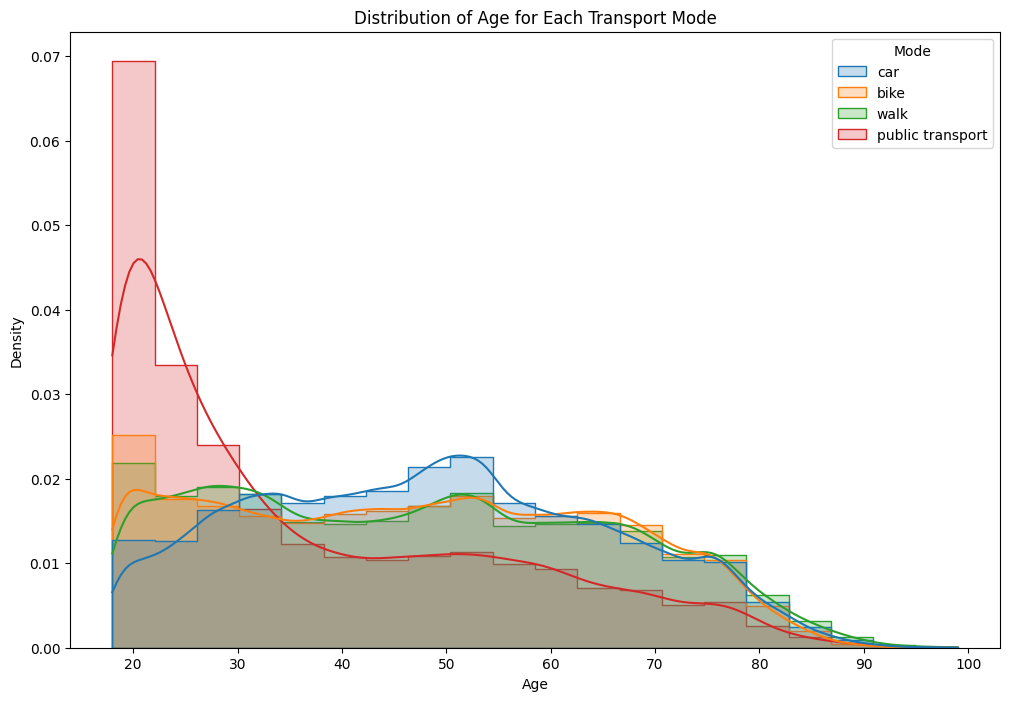

In [171]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

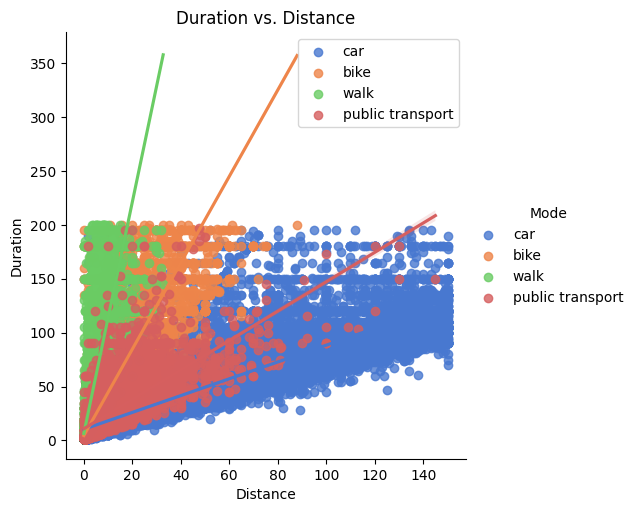

In [172]:
sns.lmplot(data=df, x='Distance_in_kms', y='Duration', hue='Mode', palette='muted')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Duration vs. Distance')
plt.legend()
plt.show()

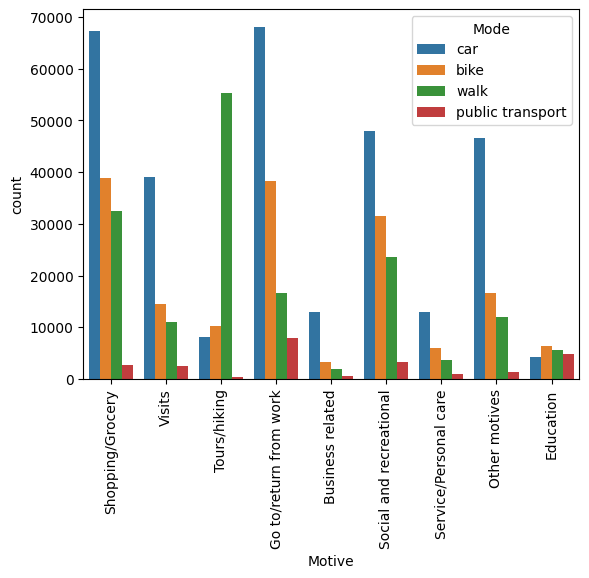

In [173]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

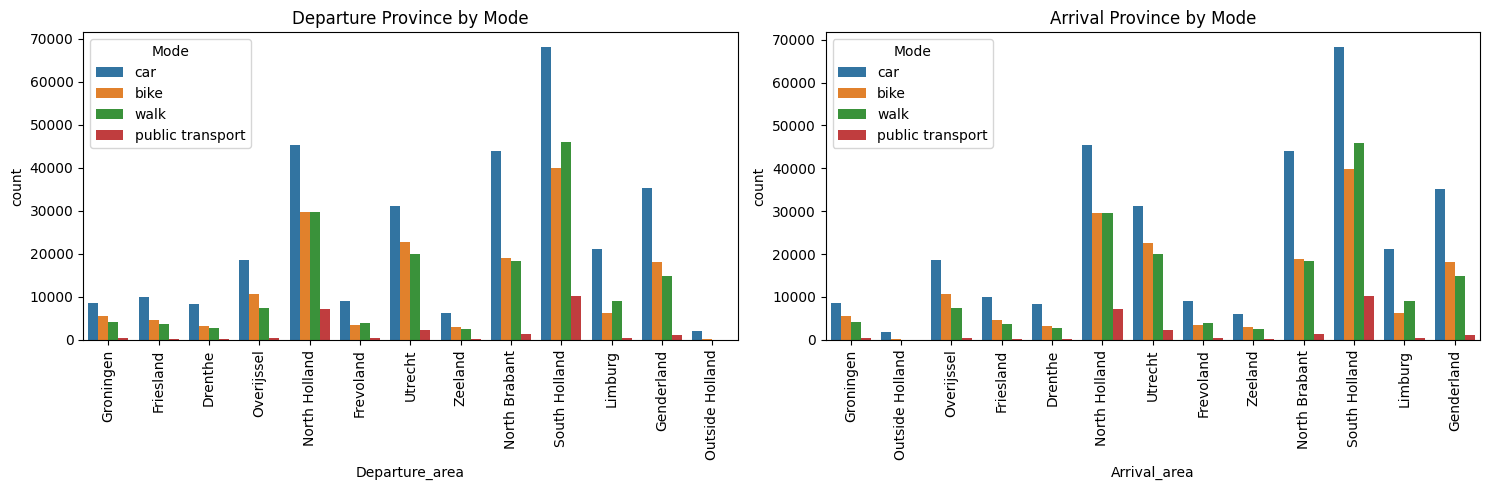

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

countplots = [
    (sns.countplot(x='Departure_area', data=df, hue="Mode", ax=axes[0]), 'Departure Province by Mode'),
    (sns.countplot(x='Arrival_area', data=df, hue="Mode", ax=axes[1]), 'Arrival Province by Mode'),
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

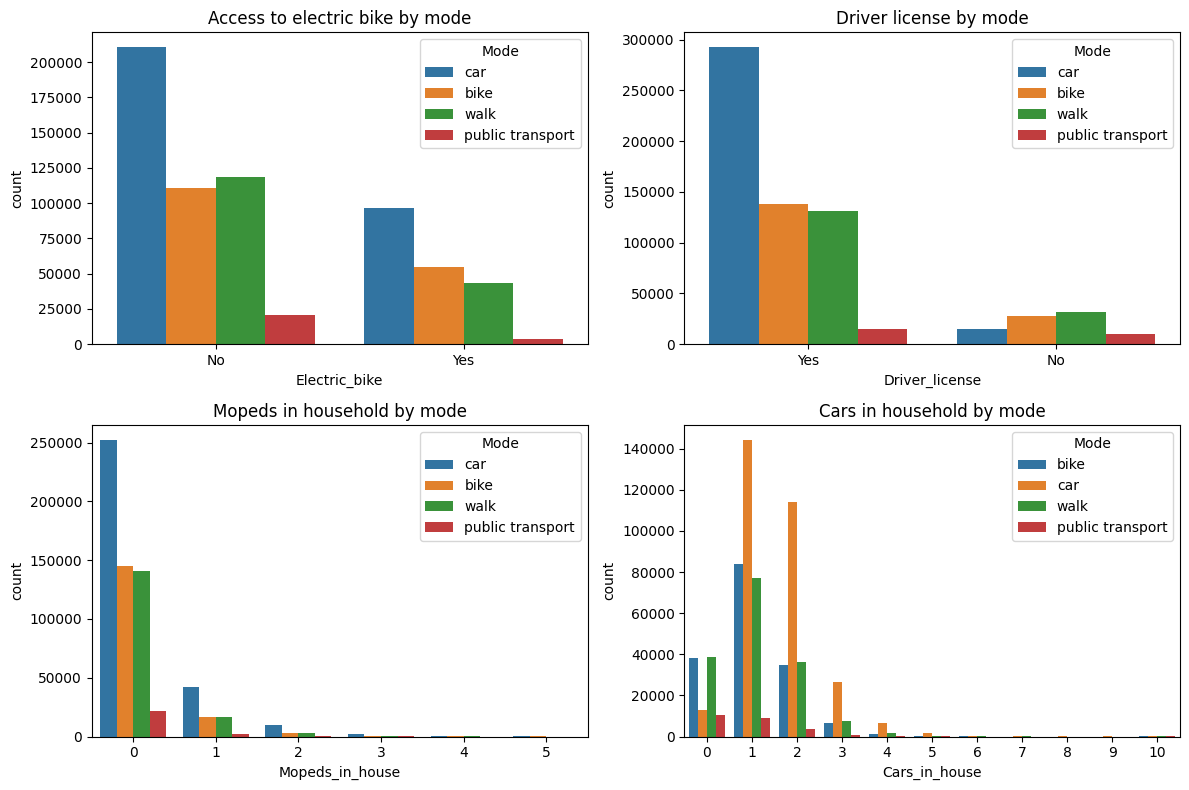

In [175]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Driver license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

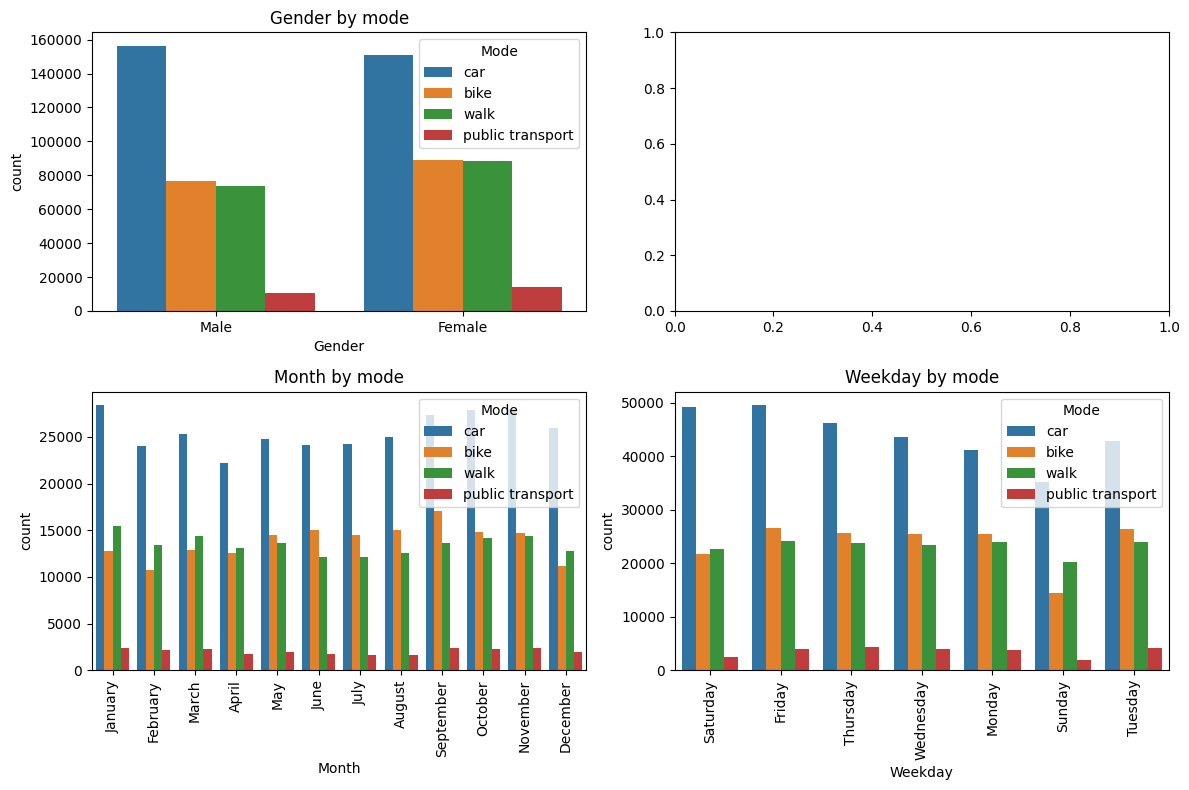

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [178]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,659845.000000,659845.000000,659845.000000,659845.000000,659845.000000,659845.000000,659845.000000
mean,2.621122,47.480046,1.347562,0.197549,22.971402,13.644685,9.702596
std,1.294353,17.725887,0.984345,0.532204,24.271318,4.300804,17.592279
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.200000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,9.500000
max,10.000000,99.000000,10.000000,5.000000,200.000000,23.000000,150.000000


In [179]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.855383
North Holland      16.939584
North Brabant      12.508089
Utrecht            11.525282
Genderland         10.500042
Overijssel          5.585706
Limburg             5.571005
Groningen           2.841425
Friesland           2.815055
Frevoland           2.545143
Drenthe             2.195516
Zeeland             1.769203
Outside Holland     0.348567
Name: proportion, dtype: float64


In [180]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Departure_area'] = df['Departure_area'].replace(value_mapping)

In [181]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland    24.855383
Other            23.671620
North Holland    16.939584
North Brabant    12.508089
Utrecht          11.525282
Genderland       10.500042
Name: proportion, dtype: float64


In [182]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.895544
North Holland      16.936402
North Brabant      12.515363
Utrecht            11.541650
Genderland         10.503527
Overijssel          5.584796
Limburg             5.575097
Groningen           2.843698
Friesland           2.815055
Frevoland           2.537566
Drenthe             2.189454
Zeeland             1.763141
Outside Holland     0.298707
Name: proportion, dtype: float64


In [183]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Arrival_area'] = df['Arrival_area'].replace(value_mapping)

In [184]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland    24.895544
Other            23.607514
North Holland    16.936402
North Brabant    12.515363
Utrecht          11.541650
Genderland       10.503527
Name: proportion, dtype: float64


In [185]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.532307
Secondary            32.934704
Lower vocational     13.752927
Other education       2.334639
Primary education     1.785722
No education          0.659700
Name: proportion, dtype: float64


In [186]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other",
                }
df['Education'] = df['Education'].replace(value_mapping)

In [187]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.532307
Secondary           32.934704
Lower vocational    13.752927
Other                4.780062
Name: proportion, dtype: float64


In [188]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.434882
Go to/return from work     19.822686
Social and recreational    16.134395
Other motives              11.647735
Tours/hiking               11.203540
Visits                     10.156173
Service/Personal care       3.565989
Education                   3.208935
Business related            2.825664
Name: proportion, dtype: float64


In [189]:
value_mapping = {
                 "Service/Personal care":"Care/Education/Business",
                 "Education":"Care/Education/Business",
                 "Business related":"Care/Education/Business",
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [190]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.434882
Go to/return from work     19.822686
Social and recreational    16.134395
Other motives              11.647735
Tours/hiking               11.203540
Visits                     10.156173
Care/Education/Business     9.600588
Name: proportion, dtype: float64


In [191]:
one_hot_encoded = pd.get_dummies(df[['Departure_area', 'Background', 'Motive', 'Education']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

In [192]:
df['Hour'] = df['Hour'].astype('category')
hour_dummies = pd.get_dummies(df['Hour'], prefix='Hour').astype(int)
df = pd.concat([df, hour_dummies], axis=1)

In [193]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Arrival_area", "Holiday",]
for col in features:
    df[col]=le.fit_transform(df[col])

In [194]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [195]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [196]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [197]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,42,Dutch,Secondary,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,42,Dutch,Secondary,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,42,Dutch,Secondary,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,1,42,Dutch,Secondary,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,1,42,Dutch,Secondary,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,Non Western migration,Higher education,1,1,0,0,12,...,0,1,0,0,0,0,0,0,0,0
817122,3,0,49,Non Western migration,Higher education,1,1,0,0,12,...,0,0,1,0,0,0,0,0,0,0
817123,3,0,49,Non Western migration,Higher education,1,1,0,0,12,...,0,0,0,1,0,0,0,0,0,0
817124,3,0,49,Non Western migration,Higher education,1,1,0,0,12,...,0,0,0,0,1,0,0,0,0,0


In [198]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive', 'Departure_area',
       'Arrival_area', 'Duration', 'Hour', 'Mode', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Care/Education/Business',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Tours/hiking', 'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Education_Secondary',
       'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
     

In [199]:
drops = ['Departure_area', 'Background', 'Motive', 'Education', 'Hour', 'Arrival_area']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,42,1,1,0,0,1,6,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,1,0,0,0,0,0
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,1,0,0,12,4,0,...,0,1,0,0,0,0,0,0,0,0
817122,3,0,49,1,1,0,0,12,4,0,...,0,0,1,0,0,0,0,0,0,0
817123,3,0,49,1,1,0,0,12,4,0,...,0,0,0,1,0,0,0,0,0,0
817124,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,1,0,0,0,0,0


In [200]:
df.duplicated().sum()

136

In [201]:
df = df.drop_duplicates()
df.shape

(659709, 58)

In [202]:
df.isnull().any()

People_in_house                     False
Gender                              False
Age                                 False
Driver_license                      False
Cars_in_house                       False
Mopeds_in_house                     False
Electric_bike                       False
Month                               False
Weekday                             False
Holiday                             False
Round_trip                          False
Duration                            False
Mode                                False
Distance_in_kms                     False
Departure_area_Genderland           False
Departure_area_North Brabant        False
Departure_area_North Holland        False
Departure_area_Other                False
Departure_area_South Holland        False
Departure_area_Utrecht              False
Background_Dutch                    False
Background_Non Western migration    False
Background_Western migration        False
Motive_Care/Education/Business    

In [204]:
csv_filename = 'data.csv'
df.to_csv(csv_filename, index=False)
zip_filename = 'data.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename)
import os
os.remove(csv_filename)